<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico </h1>
<h3> Análisis y Visualización de Datos - 2020 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con un estimadores principal: *hf_score* que hace referencia a Human Freedom, que a su vez está calculado en base a dos otros estimadores *ef_score*, para Economic Freedom y *pf_score*, para Personal Freedom. Estos tres estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn

In [2]:
seaborn.__version__

'0.9.0'

Si un archivo está disponible en la web, podemos leerlo con pandas utilizando su URL sin necesidad de descargarlo.

In [3]:
dataset = pandas.read_csv(
    'https://object.cato.org/sites/cato.org/files/human-freedom-index-files/human-freedom-index-2019.csv')
dataset.shape

(1620, 120)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'hf_score', 'hf_rank',
       'hf_quartile', 'pf_rol_procedural', 'pf_rol_civil', 'pf_rol_criminal',
       ...
       'ef_regulation_business_adm', 'ef_regulation_business_bureaucracy',
       'ef_regulation_business_start', 'ef_regulation_business_bribes',
       'ef_regulation_business_licensing', 'ef_regulation_business_compliance',
       'ef_regulation_business', 'ef_regulation', 'ef_score', 'ef_rank'],
      dtype='object', length=120)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
score_cols = [col for col in dataset.columns if 'pf_identity' in col] + [
    'pf_score', # Personal Freedom (score)
    'pf_rank', # Personal Freedom (rank)
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols = ['year', 'ISO_code', 'countries', 'region'] + score_cols

In [6]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0,10,10,10,7.5,5.8,8.01,46,7.67,30,7.84,38
1,2017,DZA,Algeria,Middle East & North Africa,-,0,0,0,0,0,5.2,146,4.77,159,4.99,155
2,2017,AGO,Angola,Sub-Saharan Africa,10,0,0,0,5,5,5.98,121,4.83,158,5.4,151
3,2017,ARG,Argentina,Latin America & the Caribbean,10,10,10,10,10,10,8.04,41,5.67,147,6.86,77
4,2017,ARM,Armenia,Caucasus & Central Asia,7,10,10,10,7.5,8.2,7.15,72,7.7,27,7.42,54
5,2017,AUS,Australia,Oceania,7,10,10,10,10,9,9.16,12,8.07,9,8.62,5
6,2017,AUT,Austria,Western Europe,10,10,10,10,10,10,9.25,8,7.71,26,8.48,13
7,2017,AZE,Azerbaijan,Caucasus & Central Asia,0,10,10,10,7.5,5.8,6.1,119,6.34,116,6.22,121
8,2017,BHS,Bahamas,Latin America & the Caribbean,-,10,10,10,10,10,7.87,48,7.25,58,7.56,48
9,2017,BHR,Bahrain,Middle East & North Africa,-,10,10,10,0,5,5.91,126,7.35,50,6.63,95


Si analizamos los tipos, vemos que casi todas las columnas se leen como objetos debido a que los valores nulos están marcados con `-`. Los vamos a eliminar y volveremos a convertir las columnas con puntajes a tipo numérico.

In [7]:
dataset.dtypes

year                                   int64
ISO_code                              object
countries                             object
region                                object
hf_score                              object
hf_rank                               object
hf_quartile                           object
pf_rol_procedural                     object
pf_rol_civil                          object
pf_rol_criminal                       object
pf_rol                                object
pf_ss_homicide                        object
pf_ss_disappearances_disap            object
pf_ss_disappearances_violent          object
pf_ss_disappearances_organized        object
pf_ss_disappearances_fatalities       object
pf_ss_disappearances_injuries         object
pf_ss_disappearances                  object
pf_ss_women_fgm                       object
pf_ss_women_inheritance_widows        object
pf_ss_women_inheritance_daughters     object
pf_ss_women_inheritance               object
pf_ss_wome

In [8]:
dataset = dataset[important_cols].replace('-', numpy.nan)
for score_col in score_cols:
  dataset[score_col] = pandas.to_numeric(dataset[score_col])
dataset[:5]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
0,2017,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,7.5,5.8,8.01,46.0,7.67,30.0,7.84,38.0
1,2017,DZA,Algeria,Middle East & North Africa,NaN,0.0,0.0,0.0,0.0,0.0,5.20,146.0,4.77,159.0,4.99,155.0
2,2017,AGO,Angola,Sub-Saharan Africa,10.0,0.0,0.0,0.0,5.0,5.0,5.98,121.0,4.83,158.0,5.40,151.0
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,7.5,8.2,7.15,72.0,7.70,27.0,7.42,54.0


In [9]:
dataset.dtypes

year                        int64
ISO_code                   object
countries                  object
region                     object
pf_identity_legal         float64
pf_identity_sex_male      float64
pf_identity_sex_female    float64
pf_identity_sex           float64
pf_identity_divorce       float64
pf_identity               float64
pf_score                  float64
pf_rank                   float64
ef_score                  float64
ef_rank                   float64
hf_score                  float64
hf_rank                   float64
dtype: object

# Parte 1

Luego de las clases del primer fin de semana, ya tenemos las herramientas para responder las siguientes preguntas:

## 1. Estadísticos descriptivos

###  1.1 Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [10]:
# calculo manual
import numpy as np

def rango(var):
    print(score_col + ' = '+ str(var.max()- var.min()))
    
for score_col in score_cols:
    rango(dataset[score_col])


pf_identity_legal = 10.0
pf_identity_sex_male = 10.0
pf_identity_sex_female = 10.0
pf_identity_sex = 10.0
pf_identity_divorce = 10.0
pf_identity = 10.0
pf_score = 7.34
pf_rank = 161.0
ef_score = 6.529999999999999
ef_rank = 161.0
hf_score = 5.43
hf_rank = 161.0


In [11]:
# calculo usando la funcion de rango predefinida ptp de numpy
import numpy as np
for score_col in score_cols:
  print(score_col + ' = '+ str(np.ptp(dataset[score_col])))

pf_identity_legal = 10.0
pf_identity_sex_male = 10.0
pf_identity_sex_female = 10.0
pf_identity_sex = 10.0
pf_identity_divorce = 10.0
pf_identity = 10.0
pf_score = 7.34
pf_rank = 161.0
ef_score = 6.529999999999999
ef_rank = 161.0
hf_score = 5.43
hf_rank = 161.0


### 1.2. Para cada país, tenemos varias realizaciones para cada variable *pf_identity* y *hf_score*. Si queremos comparar un país con otro, ¿cuál es la manera adecuada de hacerlo? Por ejemplo, ¿nos quedamos con un único valor? ¿o comparamos todos los valores? ¿usamos el promedio? ¿usamos la mediana? 

Compararia los paises teniendo en cuenta la mediana, ya que es un valor que no se ve influenciado por valores extremos... una vez ordenados los valores se tiene la misma candidad de elemnetos por debado de la mediana que por encima, por lo tanto me permitiría hacer una comparación sin el problema de los outlayers.

### 1.3. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. Usar la respuesta del punto anterior para justificar si la comparación es válida o no.

In [12]:
dataset.region.unique()

array(['Eastern Europe', 'Middle East & North Africa',
       'Sub-Saharan Africa', 'Latin America & the Caribbean',
       'Caucasus & Central Asia', 'Oceania', 'Western Europe',
       'South Asia', 'North America', 'East Asia'], dtype=object)

In [13]:
import pandas as pd

latam = dataset[(dataset.region == "Latin America & the Caribbean")]
latam[:5]


,year,ISO_code,countries,region,pf_identity_legal,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_score,ef_rank,hf_score,hf_rank
3,2017,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,8.04,41.0,5.67,147.0,6.86,77.0
8,2017,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.87,48.0,7.25,58.0,7.56,48.0
11,2017,BRD,Barbados,Latin America & the Caribbean,NaN,0.0,0.0,0.0,10.0,5.0,7.59,57.0,6.45,112.0,7.02,66.0
14,2017,BLZ,Belize,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,7.12,74.0,6.78,85.0,6.95,68.0
17,2017,BOL,Bolivia,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,7.07,75.0,6.14,126.0,6.61,97.0


In [14]:
import numpy as np
import pandas as pd

print('Latam')
print('Latam, pf_identity, Media = '+ str(np.mean(latam.pf_identity)))
print('Latam, pf_identity, Mediana = '+ str(np.median(latam.pf_identity.dropna())))
print('Latam, pf_identity, Dev.Est. = '+ str(np.std(latam.pf_identity)))

print('Latam, hf_score, Media = '+ str(np.mean(latam.hf_score)))
print('Latam, hf_score, Mediana = '+ str(np.median(latam.hf_score.dropna())))
print('Latam, hf_score, Dev.Est. = '+ str(np.std(latam.hf_score)))

print('Mundo')

print('Mundo, pf_identity, Media = '+ str(np.mean(dataset.pf_identity)))
print('Mundo, pf_identity, Mediana = '+ str(np.median(dataset.pf_identity.dropna())))
print('Mundo, pf_identity, Dev.Est. = '+ str(np.std(dataset.pf_identity)))

print('Mundo, hf_score, Media = '+ str(np.mean(dataset.hf_score)))
print('Mundo, hf_score, Mediana = '+ str(np.median(dataset.hf_score.dropna())))
print('Mundo, hf_score, Dev.Est. = '+ str(np.std(dataset.hf_score)))


Latam
Latam, pf_identity, Media = 8.582170542635659
Latam, pf_identity, Mediana = 10.0
Latam, pf_identity, Dev.Est. = 1.8721934908121116
Latam, hf_score, Media = 7.036976744186046
Latam, hf_score, Mediana = 7.02
Latam, hf_score, Dev.Est. = 0.6336654836706834
Mundo
Mundo, pf_identity, Media = 7.280649350649351
Mundo, pf_identity, Mediana = 8.8
Mundo, pf_identity, Dev.Est. = 3.1805438715105745
Mundo, hf_score, Media = 6.978214285714286
Mundo, hf_score, Mediana = 6.9
Mundo, hf_score, Dev.Est. = 1.0558962430843073


##### Se observa para ambas variables, que los datos están menos dispersos en Latam que en el mundo.
##### Por lo tanto una menor dispersion genera un valor de media mas confiable en el set de datos para latam que los pertenecientes al mundo.
##### En ambos casos **latam** y **mundo** se observa que el valor de la media es mas chico que el de la mediana para la variable **pf_identity**, esto puede deverse al efecto de datos extremos que traccionen el valor de la media. Al no coicidir los valores de media y mediana, sino más bien se detecta una **asimetría negativa**, vemos que a priori no es una distribucion normal la que explica a este conjunto de datos.
##### En ambos casos **latam** y **mundo** se observa que el valor de la media es practicamente igual al de la mediana para para la variable **hf_score**, por lo que a priori estos datos parecen tener una **distribución normal**.

### 1.4 ¿Tiene sentido calcular la moda?

In [15]:
import scipy.stats as stats

print('Latam')
print('Latam, pf_identity, Moda = '+ str(stats.mode(latam.pf_identity)))
print('Latam, hf_score, Moda = '+ str(stats.mode(latam.pf_identity)))

print('Mundo')
print('Mundo, pf_identity, Moda = '+ str(stats.mode(dataset.pf_identity)))
print('Mundo, hf_score, Moda = '+ str(stats.mode(dataset.pf_identity)))


Latam
Latam, pf_identity, Moda = ModeResult(mode=array([10.]), count=array([148]))
Latam, hf_score, Moda = ModeResult(mode=array([10.]), count=array([148]))
Mundo
Mundo, pf_identity, Moda = ModeResult(mode=array([10.]), count=array([618]))
Mundo, hf_score, Moda = ModeResult(mode=array([10.]), count=array([618]))


##### Si tiene sentido calcular la **moda** ya que nos permite corroborar el sentido de la asimetría que habíamos planteado con el análisis de la **media** y la **mediana**
##### **A)** Tanto para **Latam** como para el **Mundo** podemos observar que en ambas variables el valor que más se repite es el 10. Por lo tanto este dato corrobora la **asimetría negativa** planteada para **pf_identity. Y permite rectificar la asimetría planteada para **hf_score**, ya que el valor de la moda supera al de la media y la mediana tambien vemos una **asimetría negativa** en la distribución de esta variable.
##### **B)** En cuanto a la cantidad de veces que se repite el valor de la moda para cada viariable, podemos ver que se repite mucho más veces que en el **mundo=618** que en **Latam=148**, esto nos permite dar una idea del apuntalamiento o kurtosis de estas distribuciones.

### 1.5 ¿Cómo pueden sanearse los valores faltantes?

In [16]:
dataset.shape

(1620, 16)

In [17]:
# chaqueo si hay nulos y si es así cuantos hay 
print(dataset.pf_identity.isnull().sum())

80


In [18]:
# chaqueo si hay nulos y si es así cuantos hay 
print(dataset.hf_score.isnull().sum())

80


In [19]:
latam.shape

(260, 16)

In [20]:
# chaqueo si hay nulos y si es así cuantos hay 
print(latam.pf_identity.isnull().sum())

2


In [21]:
# chaqueo si hay nulos y si es así cuantos hay 
print(latam.hf_score.isnull().sum())

2


##### Como tengo suficientes grados de libertad puedo quitar del análisis las filas que posean datos faltantes (nan) ya que aunque la base de datos se reduzca, me alcanzan los grados de libertad para los futuros análisis.
##### Otra opción puede ser remplazar el nan por el valor de la media de esa variable para que no tire la distribución hacia abajo al usar 0 como suele suceder...
##### De todos modos como las filas con datos faltantes son las mismas en las dos variables con las que estoy trabajando elijo la opcion de no tenerlas en cuenta... no las elimino por las dudas las necesite luego... voy a obviar los valores nan por el momento

In [22]:
import pandas as pd

dataset_notna = dataset[pd.notnull(dataset['pf_identity'])]
print(dataset_notna.pf_identity.isnull().sum())
print(dataset_notna.hf_score.isnull().sum())

# si también dejé de lado todos los reegistros nan para la variable hf_score, 
# me aseguro de que los registros nulos para ambas variables eran los mismos. 

0
0


In [23]:
dataset_notna.shape

(1540, 16)

In [24]:
import pandas as pd

latam_notna = latam[pd.notnull(latam['pf_identity'])]
print(latam_notna.pf_identity.isnull().sum())
print(latam_notna.hf_score.isnull().sum())

# si también dejé de lado todos los reegistros nan para la variable hf_score, 
# me aseguro de que los registros nulos para ambas variables eran los mismos. 

0
0


### 1.6 ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? Los outliers, ¿son globales o por grupo? ¿Los eliminaría del conjunto de datos?

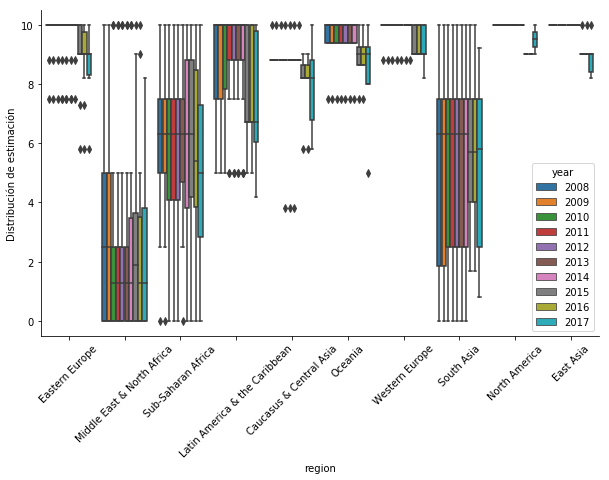

In [25]:
# Este tipo de gráfico me permite graficar distribuciones por grupos y ver si quedan valores sueltos.
# y si estos valores siguen algún ordenamiento.
# Mediante un gráfico de cajas puedo ver los outlaiers que en un grafico de barras quedarian 
# dentro de la barra de desviación estandar.
# En este caso si se observa los outlaiers agrupados dentro de las regiones.

plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset_notna,
                x='region', y='pf_identity',
                hue='year')
plt.ylabel('Distribución de estimación')
plt.xlabel('region')
plt.xticks(rotation=45)
seaborn.despine()

In [26]:
# Para filtrar los outliers decidí utilizar la fórmula que deja solo aquellos valores 
# que se encuentran a 2.5 desviaciones estandar de la media

def clean_outliers(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_salarios_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <= (2.5 * interesting_col.std()))
    return dataset[mask_salarios_outlier]

dataset_clean = clean_outliers(dataset_notna, "pf_identity")
print("Filas removidas", len(dataset_notna) - len(dataset_clean))

Filas removidas 0


In [27]:
dataset_clean.shape

(1540, 16)

In [28]:
dataset_clean = clean_outliers(dataset_notna, "hf_score")
print("Filas removidas", len(dataset_notna) - len(dataset_clean))

Filas removidas 13


In [29]:
latam_clean = clean_outliers(latam_notna, "pf_identity")
print("Filas removidas", len(latam_notna) - len(latam_clean))

Filas removidas 0


In [30]:
latam_clean = clean_outliers(latam_notna, "hf_score")
print("Filas removidas", len(latam_notna) - len(latam_clean))

Filas removidas 10


In [31]:
# luego de la limpieza de valores nulos y de outlayer calculo cuantos registros filtré en total

print("Total de Filas removidas, Dataset= ", len(dataset) - len(dataset_clean))
print("Total de Filas removidas, Latam= ", len(latam) - len(latam_clean))
                                                            
                                                            

Total de Filas removidas, Dataset=  93
Total de Filas removidas, Latam=  12


## 2. Agregación de datos
### 2.1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.


Text(0.5,1,'Latam')

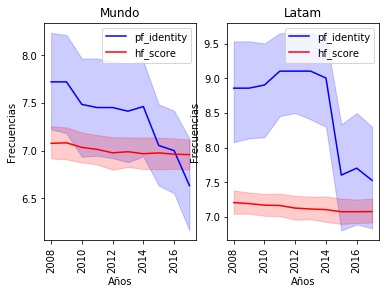

In [60]:
import numpy as np
import matplotlib.pyplot as plt

plt.subplot(121)
p1= seaborn.lineplot(data=dataset_clean, x='year', y='pf_identity', estimator=np.mean, color='blue', label='pf_identity')
seaborn.lineplot(data=dataset_clean, x='year', y='hf_score', estimator=numpy.mean, color='red', label='hf_score')
plt.xticks(rotation=90);
plt.xlabel('Años')
plt.ylabel('Frecuencias')
plt.title('Mundo')

plt.subplot(122)
p2= seaborn.lineplot(data=latam_clean, x='year', y='pf_identity', estimator=np.mean, color='blue', label='pf_identity')
seaborn.lineplot(data=latam_clean, x='year', y='hf_score', estimator=numpy.mean, color='red', label='hf_score')
plt.xticks(rotation=90);
plt.xlabel('Años')
plt.ylabel('Frecuencias')
plt.title('Latam')

# En los graficos es posible observar que la variable pf_idendity ha caino abruptamente a nivel mundial, y aún más en Latioamérica
# Pero a pesar de esto actualemnte es más alto el valor de la media de pf_identity en Latinoamérica

# En cuando al comportameniendo de la variable hf_score se observa un patron de comportamiento muy similar en ambos gráficos
# siendo el valor de media para latinoamérica y el mundo aproximadamente el mismo... manteniendose durante los años.


### 2.2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?


Text(0.5,1,'hf_score por Regiones')

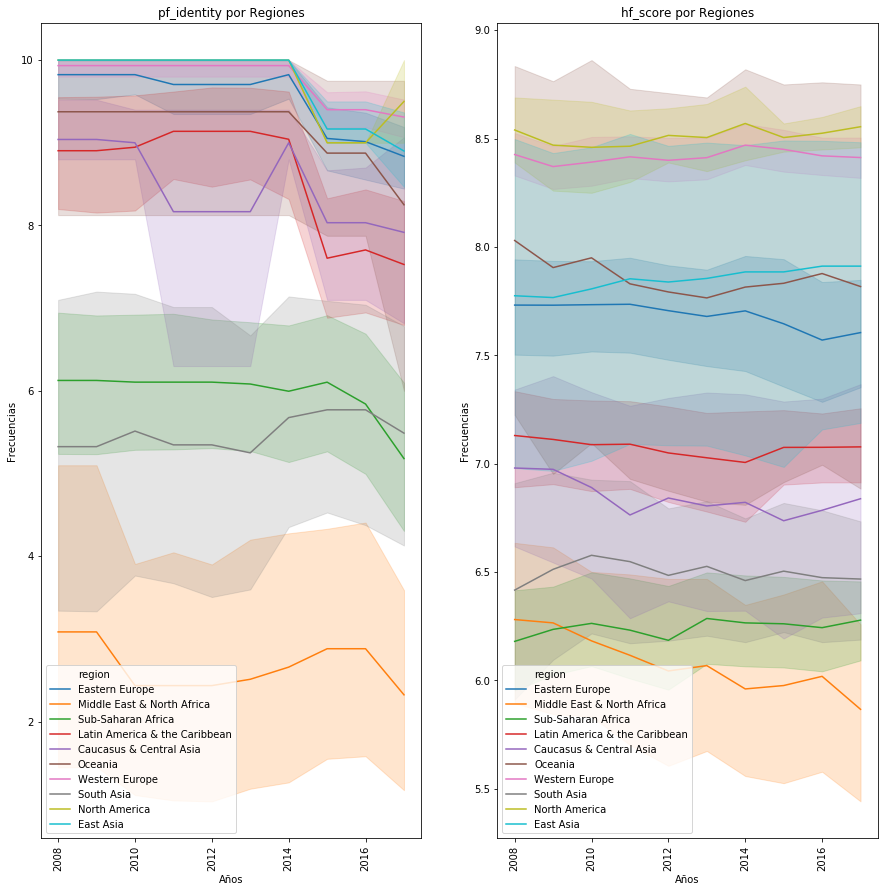

In [71]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure (figsize=(15,15))

plt.subplot(121)
p2= seaborn.lineplot(data=dataset_clean, x='year', y='pf_identity', hue='region', estimator=np.mean)
plt.xticks(rotation=90);
plt.xlabel('Años')
plt.ylabel('Frecuencias')
plt.title('pf_identity por Regiones')

plt.subplot(122)
p2= seaborn.lineplot(data=dataset_clean, x='year', y='hf_score', hue='region',estimator=np.mean)
plt.xticks(rotation=90);
plt.xlabel('Años')
plt.ylabel('Frecuencias')
plt.title('hf_score por Regiones')

# Para hf_score la tendencia parece ser la misma dividiendo por regiones o analizando a nivel global.
# Para pf_identity se observan algunas regiones con caidas más marcadas en el índice que otras.
# Incluso para Norteamérica se aprecia que el índice ha subido en los últimos años.

### 3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

#### Pista: hay gráficos de seaborn que permiten generar visualizaciones para cada valor de una variable categórica, en este caso, las distintas regiones.

#### Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

Text(0.5,1,'pf_identity por país de Latam')

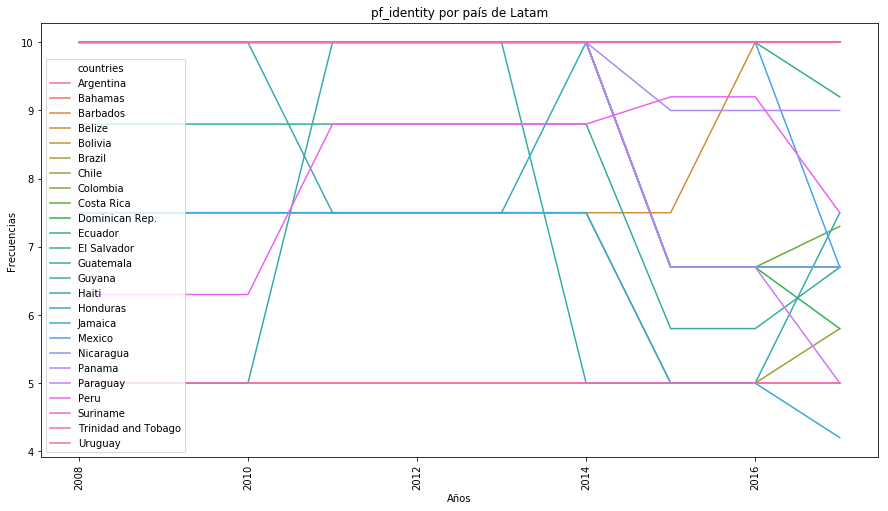

In [84]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure (figsize=(15,8))

seaborn.lineplot(data=latam_clean, x='year', y='pf_identity', hue='countries', estimator=np.mean)
plt.xticks(rotation=90);
plt.xlabel('Años')
plt.ylabel('Frecuencias')
plt.title('pf_identity por país de Latam')

# Gracias a este gráfco podemos ver que la caida abrupta del índice no es de todos los países de Latam.
# varios paises se mantienen constantes y muy pocos tienen un leve aumento, pero debido a que las caidas de otros paises
# son tan grandes, esto lleva a arrastrar la tendencia general del índice hacia abajo.

Text(0.5,1,'hf_score por país de Latam')

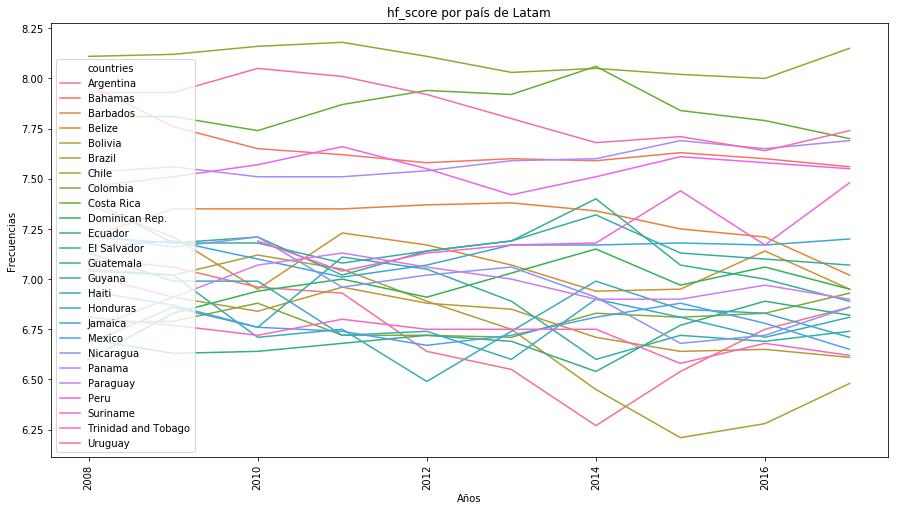

In [88]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure (figsize=(15,8))

seaborn.lineplot(data=latam_clean, x='year', y='hf_score', hue='countries', estimator=np.mean)
plt.xticks(rotation=90);
plt.xlabel('Años')
plt.ylabel('Frecuencias')
plt.title('hf_score por país de Latam')

# En este caso se obserba que se mantiene bastante la tendencia de este índice observada en el grafico de Latam.

Text(0.5,1,'ef_score por país de Latam')

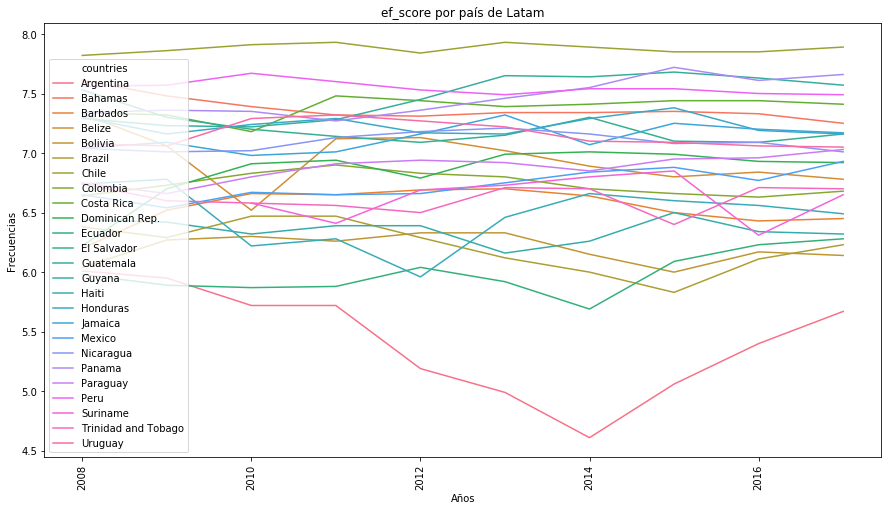

In [89]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure (figsize=(15,8))

seaborn.lineplot(data=latam_clean, x='year', y='ef_score', hue='countries', estimator=np.mean)
plt.xticks(rotation=90);
plt.xlabel('Años')
plt.ylabel('Frecuencias')
plt.title('ef_score por país de Latam')

# Mientras la mayoría de los paises mantiene una tendencia similar de comportamiento para el índice de libertad económica,
# se observa que Argentina tuvo una caída muy notable del mismo, llegando a su punto más bajo en 2014.
# Esta caida del índice de libertad economica se debe a las políticas de gobierno tomadas en esos años como:
# el control de capitales, la fijacion de precios, la restriccion de importaciones,la nacionalizaciones de empresas, etc. 

## 3. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos el conjunto de valores disponibles para esa region en estos gráficos?


Text(0.5,1,'Histograma de distribucuón de hf_score')

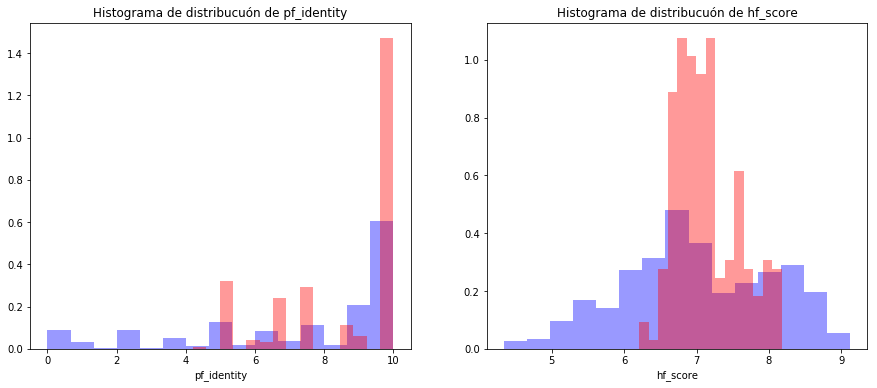

In [99]:
import seaborn
import matplotlib.pyplot as plt

plt.figure (figsize=(15,6))

plt.subplot(121)
seaborn.distplot(dataset_clean.pf_identity, color='blue', label='Mundial', bins=15, kde=False, norm_hist=True)
seaborn.distplot(latam_clean.pf_identity, color='red', label='Latam', bins=15, kde=False, norm_hist=True)
plt.xlabel('pf_identity')
plt.title('Histograma de distribución de pf_identity')

plt.subplot(122)
seaborn.distplot(dataset_clean.hf_score, color='blue', label='Mundial', bins=15, kde=False, norm_hist=True)
seaborn.distplot(latam_clean.hf_score, color='red', label='Latam', bins=15, kde=False, norm_hist=True)
plt.xlabel('hf_score')
plt.title('Histograma de distribución de hf_score')

# pf_identity, variable continua, dist. asimétrica -> distribución Beta.
# hf_score, variable continua, dist. algo simétrica-> distribución normal ó logística.

## 4. Correlaciones y Relaciones

En este ejercicio queremos responder a las preguntas

* Las libertades personales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, pf_score y ef_score. 

Como pf_indentity contribuye al cálculo de pf_score esperamos hallar algún grado de correlación. Lo contrario podría ocurrir con ef_score. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación (visual) entre pf_identity y pf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en la práctica, discreta, y eso afecta al tipo de gráfico que podemos usar.
3. Convertir estas variables en categóricas, es decir, a partir de pf_indentity generar otra variable pf_identity_segment que tome los valores `high`, `medium` y `low`. Pueden hacerlo con una función escrita por ustedes, o usando alguna función de pandas como `pandas.cut` o `pandas.dcut`. Repetir para ef_score y pf_score. El criterio para decidir qué intervalos de valores corresponden a cada categoría tienen que decidirlo ustedes, pueden usar los estadísticos mediana y los cuartiles.
4. Graficar la correlación (visual) entre estas tres variables categoricas usando gráficos de calor (heatmaps). Note: van a necesitar 3 gráficos distintos, porque en cada uno podemos incluir sólo 2 variables.



# Parte 2

Luego del segundo fin de semana de clase, podemos revisitar nuestro trabajo anterior y completarlo respondiendo a las siguientes preguntas:

## 3. Distribuciones

2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

## 4. Correlaciones

3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el pf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros). Genere nuevas variables categóricas ordinales para calcular la correlación Tau de Kendal y genere una tabla de contingencia con esas nuevas variables.

Además de completar estos puntos faltantes, luego de haber visitado los conceptos de percepción visual y comunicación efectiva, están en condiciones de reveer los gráficos realizados y evaluar si pueden ser mejorados. Para ello, puede hacerse las siguientes preguntas:

* ¿Están utilizando el tipo de gráfico adecuado para cada tipo de variable?
* Los gráficos, ¿son legibles?
* Los gráficos generados, ¿responden a las preguntas mostrando un patrón claro? En caso de que no, ¿podemos filtrar los datos para que el patrón sea más evidente? ¿o agruparlos de manera distinta? ¿o cambiar el tipo de gráfico?